# 다큐멘터리 대분류

In [1]:
!pip install matplotlib

In [2]:
# 나눔글꼴 설치
!apt install fonts-nanum

# Plotnine 패키지 설치
!pip install plotnine

# 기본 글꼴 변경
import matplotlib as mpl
# mpl.font_manager._rebuild()
# mpl.pyplot.rc('font', family='NanumBarunGothic')

# 레티나 디스플레이 지원
%config InlineBackend.figure_format = 'retina'

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import pandas as pd
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.23.4
1.15.1


In [4]:
docus = pd.read_excel('final.xlsx', encoding='utf-8')
docus.shape

(1890, 10)

In [5]:
!python --version

Python 3.7.0


In [6]:
docus.head(1)

,id,tv,title,epi,dates,links,synop,vod_key,대분류,sort
0,1,SBS,SBS 스페셜,그랜드 슬램 대탐험 걸어서 지구 끝까지,2005-07-10,http://programs.sbs.co.kr/culture/sbsspecial/v...,SBS 스페셜 1편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,"'움직', '프로그램', '블리자드', '순간', '그랜드슬램'",인문,1


In [7]:
docus=docus[['id','tv','title','epi','synop','vod_key','대분류']]
docus.tail(1)

,id,tv,title,epi,synop,vod_key,대분류
1889,1890,SBS,SBS 스페셜,복흥 O.B.A 소녀들은 자란다,복흥 O.B.A소녀들은 자란다 사춘기 자녀를 둔 부모들에게아이를 키우는 부모라면 ...,"'자녀', '부모', '순간', '소녀들'",NaN


In [8]:
docus['대분류'][1889] = '가정'

In [9]:
docus.tail(1)

,id,tv,title,epi,synop,vod_key,대분류
1889,1890,SBS,SBS 스페셜,복흥 O.B.A 소녀들은 자란다,복흥 O.B.A소녀들은 자란다 사춘기 자녀를 둔 부모들에게아이를 키우는 부모라면 ...,"'자녀', '부모', '순간', '소녀들'",가정


In [10]:
sample_index = docus.iloc[0][0]
sample_index

1

In [11]:
sample_title = docus['epi'][sample_index]
sample_title

'꿈을 쏘다! - 박주영 박지성'

In [12]:
sample_content = docus['synop'][sample_index]
# sample_content

# 전처리 하기

In [13]:
def preprocessing(text):
    # 개행문자 제거
    text= str(text)
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [14]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [15]:
# 샘플데이터에 적용
pre_sample_content = preprocessing(sample_content)

In [16]:
pre_sample_content = remove_stopwords(pre_sample_content)

In [17]:
# pre_sample_content

In [18]:
%time docus['content_preprocessing'] = docus['synop'].apply(preprocessing)

Wall time: 542 ms


In [19]:
%time docus['content_preprocessing2'] = docus['content_preprocessing'].apply(remove_stopwords)

Wall time: 751 ms


# 학습세트와 테스트세트 만들기
* 학습세트와 테스트세트를 나눠준다.
* ebs를 학습세트로 둔다

In [20]:
926*3/7

396.85714285714283

In [21]:
p = r'.*(EBS).*'
EBS = docus[docus['tv'].str.match(p)]
EBS.shape

(926, 9)

In [22]:
df_train = EBS
df_train.shape

(926, 9)

In [23]:
df_ebs = df_train[df_train['tv'] == 'EBS']

In [24]:
df_ebs.shape

(926, 9)

In [25]:
df_train.head(1)

,id,tv,title,epi,synop,vod_key,대분류,content_preprocessing,content_preprocessing2
107,108,EBS,다큐프라임,"하늘의 땅, 몽골-제1부 초원의 전설 토올",n KBI와 EBS가 공동기획하고 문화관광부가 제작을 지원한 한몽 공동제작 프...,"'프로그램', '한국', '몽골', '교류', '나라', '알타이', '역사', '...",인류/문명,n KBI와 EBS가 공동기획하고 문화관광부가 제작을 지원한 한몽 공동제작 프...,n KBI와 EBS가 공동기획하고 문화관광부가 제작을 지원한 한몽 공동제작 프...


In [26]:
df_test= docus
df_test_ebs = df_test[df_test['tv'] != 'EBS']

In [27]:
df_test_ebs.shape

(964, 9)

In [28]:
df_test_ebs = df_test_ebs[:369]

In [29]:
df_test_ebs.shape

(369, 9)

In [30]:
df_test_ebs.tail(1)

,id,tv,title,epi,synop,vod_key,대분류,content_preprocessing,content_preprocessing2
695,696,SBS,SBS 스페셜,"맨발의 아이들, 선생님 되다",맨발의 아이들 선생님 되다방송일시 2012년 1월 29일 일 밤 11시연출 ...,"'마을', '감동적', '시체', '불가촉천민', '계속', '계급', '운명', ...",육아,맨발의 아이들 선생님 되다방송일시 년 월 일 일 밤 시연출 ...,맨발의 아이들 선생님 되다방송일시 년 밤 시연출 홍순철글...


# 단어 벡터화 하기

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words =None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 1, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             max_df = 0.1,
                             ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 2000, # 만들 피처의 수, 단어의 수가 된다.
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=2000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
%%time 
train_feature_vector = vectorizer.fit_transform(df_train['content_preprocessing2'])
train_feature_vector.shape

Wall time: 4.69 s


In [33]:
%%time 
test_feature_vector = vectorizer.fit_transform(df_test_ebs['content_preprocessing2'])
test_feature_vector.shape

Wall time: 3.05 s


In [34]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['gmo', 'int', 'kg', 'km', 'mbc', 'sbs 스페셜', 'the', 'tv', 'vs', '가고']

In [35]:
dist = np.sum(train_feature_vector, axis=0)

pd.DataFrame(dist, columns=vocab)

,gmo,int,kg,km,mbc,sbs 스페셜,the,tv,vs,가고,...,희망의,희망이,히말라야,히말라야를,히말라야를 넘어,힘겨운,힘들었던,힘은,힘을,힘이
0,30,60,33,33,60,47,37,28,37,85,...,75,80,50,43,46,29,108,27,30,43


In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [37]:
%%time 
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
print(train_feature_tfidf.shape)

(926, 2000)
Wall time: 3.99 ms


In [38]:
%%time 
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
print(test_feature_tfidf.shape)

(369, 2000)
Wall time: 6.98 ms


In [39]:
test_feature_tfidf.toarray()[368]

array([0., 0., 0., ..., 0., 0., 0.])

# 랜덤 포레스트로 학습시키기

In [40]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 200, n_jobs = -1, random_state=2018, max_depth = 10)
forest

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [41]:
# 학습에 사용할 y_label 을 넣어줍니다.
# 어떤 분야의 청원인지 예측할 것이기 때문에 category를 넣어줍니다.
y_label = df_train['대분류']
%time forest = forest.fit(train_feature_tfidf, y_label)

Wall time: 560 ms


# 학습이 잘 되었는지 평가하기

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = 'accuracy'
%time score = cross_val_score(forest, train_feature_vector, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
score

Wall time: 8.17 s


array([0.56451613, 0.56216216, 0.61621622, 0.48648649, 0.46486486])

In [43]:
round(np.mean(score)*100,2)

53.88

반은 맞고 반은 틀리다니...이걸 우짜니..

# 예측

In [44]:
# 테스트 데이터를 넣고 예측합니다.
y_pred = forest.predict(test_feature_vector)
y_pred[:3]

array(['인류/문명', '인류/문명', '인류/문명'], dtype=object)

In [45]:
y_pred.shape

(369,)

In [46]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 줍니다.
output = pd.DataFrame(data={'category_pred':y_pred})
output.head()

,category_pred
0,인류/문명
1,인류/문명
2,인류/문명
3,인류/문명
4,인류/문명


In [47]:
# 0과 1이 어떻게 집계 되었는지 확인합니다.
# 실제 데이터에는 답변 대상 건이 있는데 없는 것으로 예측되었
output['category_pred'].value_counts()

인류/문명    176
자연/생태    143
교육        25
과학        19
가정         3
육아         2
역사         1
Name: category_pred, dtype: int64

In [48]:
df_test_ebs['category_pred'] = y_pred

In [50]:
df_test_ebs['pred_diff'] = 0
df_test_ebs['pred_diff'] = (df_test_ebs['대분류'] == df_test_ebs['category_pred'] ) == 1
df_test_ebs['pred_diff'] = df_test_ebs['pred_diff'].astype(int)
df_test_ebs.head(1)

,id,tv,title,epi,synop,vod_key,대분류,content_preprocessing,content_preprocessing2,category_pred,pred_diff
0,1,SBS,SBS 스페셜,그랜드 슬램 대탐험 걸어서 지구 끝까지,SBS 스페셜 1편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,"'움직', '프로그램', '블리자드', '순간', '그랜드슬램'",인문,SBS 스페셜 편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,SBS 스페셜 편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,인류/문명,0


In [51]:
# 맞게 예측한 청원은 1, 틀린 예측은 0으로 표기되었습니다.
pred_diff = df_test_ebs['pred_diff'].value_counts()
pred_diff

0    292
1     77
Name: pred_diff, dtype: int64

In [52]:
print('전체 {}건의 데이터 중 {}건 예측'.format(y_pred.shape[0], pred_diff[1]))

전체 369건의 데이터 중 77건 예측


In [53]:
acc = ( pred_diff[1] / y_pred.shape[0] )*100 
print('예측 비율 {}'.format(acc))

예측 비율 20.867208672086722


In [55]:
# 제대로 예측한 카테고리 데이터를 봅니다.
predict_correct = df_test_ebs.loc[df_test_ebs['pred_diff'] == 1]
# predict_correct

## 잘 예측한 살펴보기
* 방송사별
* id list

In [56]:
# SBS가 많긴..하네^^
predict_correct['tv'].value_counts()

SBS    53
MBC    24
Name: tv, dtype: int64

In [57]:
# id list
predict_correct['id']

18      19
19      20
30      31
34      35
42      43
48      49
51      52
52      53
58      59
68      69
72      73
75      76
85      86
100    101
101    102
103    104
104    105
106    107
138    139
146    147
147    148
151    152
155    156
165    166
172    173
191    192
198    199
200    201
206    207
219    220
      ... 
413    414
421    422
422    423
451    452
452    453
460    461
462    463
473    474
482    483
484    485
489    490
490    491
493    494
497    498
505    506
515    516
526    527
531    532
533    534
554    555
566    567
567    568
571    572
586    587
635    636
637    638
666    667
685    686
686    687
690    691
Name: id, Length: 77, dtype: int64

In [87]:
predict_incorrect = df_test_ebs.loc[df_test_ebs['pred_diff'] == 0].copy()
predict_incorrect

,id,tv,title,epi,synop,vod_key,대분류,content_preprocessing,content_preprocessing2,category_pred,pred_diff
0,1,SBS,SBS 스페셜,그랜드 슬램 대탐험 걸어서 지구 끝까지,SBS 스페셜 1편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,"'움직', '프로그램', '블리자드', '순간', '그랜드슬램'",인문,SBS 스페셜 편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,SBS 스페셜 편 그랜드 슬램 대탐험 걸어서 지구 끝까지 기획 장광호...,인류/문명,0
1,2,SBS,SBS 스페셜,꿈을 쏘다! - 박주영 박지성,요즘 온 국민을 열광하게 만든 두 젊은이가 있다. 그라운드의 승부사인 박주영과 박지...,"'젊은이', '그라운드', '박주영', '박지성', '선수', '실력', '축구',...",인문,요즘 온 국민을 열광하게 만든 두 젊은이가 있다 그라운드의 승부사인 박주영과 박지...,요즘 온 국민을 열광하게 만든 두 젊은이가 있다 그라운드의 승부사인 박주영과 박지...,인류/문명,0
2,3,SBS,SBS 스페셜,메이드 인 코리아 1부 - 광복 60년 한국인들의 위상,한국에 있으면 잘 모르는데 해외에 있으면 한국인이 갖는 뭔가가 있다. 책임감 끈...,"'한국', '세계', '대표', '최고', '이들', '글라이더', '모습', '우...",인문,한국에 있으면 잘 모르는데 해외에 있으면 한국인이 갖는 뭔가가 있다 책임감 끈...,한국에 있으면 잘 모르는데 해외에 있으면 한국인이 갖는 뭔가가 있다 책임감 끈...,인류/문명,0
3,4,SBS,SBS 스페셜,메이드 인 코리아 2부 - 한국천재들,SBS 스페셜 메이드 인 코리아 2부 한국천재들 21세기형 천재 앞으로 ...,"'천재', '천재들', '세계', 'MP3', '김영세', 'PET', '연구소'",인문,SBS 스페셜 메이드 인 코리아 부 한국천재들 세기형 천재 앞으로 ...,SBS 스페셜 메이드 인 코리아 부 한국천재들 세기형 천재 앞으로 ...,인류/문명,0
4,5,SBS,SBS 스페셜,메이드 인 코리아 3부 - 한국인의 손,한국인의 손 불가능의 벽을 넘어 바이오 혁명을 이루다 세계 최초로 인간 배아 줄...,"'한국인', '세계'",인문,한국인의 손 불가능의 벽을 넘어 바이오 혁명을 이루다 세계 최초로 인간 배아 줄...,한국인의 손 불가능의 벽을 넘어 바이오 혁명을 이루다 세계 최초로 인간 배아 줄...,인류/문명,0
5,6,SBS,SBS 스페셜,메이드 인 코리아 4부 - 한류 명품이 되다,한국의 애니메이션에 매료된 파란 눈의 유럽 아이들 뉴욕 브로드웨이의 지축을 뒤흔든...,"'애니메이션', '할리우드', '감독', '세계', '열풍', '뽀로'",예술/대중문화,한국의 애니메이션에 매료된 파란 눈의 유럽 아이들 뉴욕 브로드웨이의 지축을 뒤흔든...,한국의 애니메이션에 매료된 파란 눈의 유럽 아이들 뉴욕 브로드웨이의 지축을 뒤흔든...,인류/문명,0
6,7,SBS,SBS 스페셜,메이드 인 코리아 5부 - 빨리 빨리 한국인,한국인의 빨리빨리 기질 한국인들은 밥 먹는 동안 한번도 고개를 들지 않아요. ...,"'한국', '인터넷', '시대', '대한민국'",인문,한국인의 빨리빨리 기질 한국인들은 밥 먹는 동안 한번도 고개를 들지 않아요 ...,한국인의 빨리빨리 기질 한국인들은 밥 먹는 동안 한번도 고개를 들지 않아요 ...,인류/문명,0
7,8,SBS,SBS 스페셜,메이드 인 코리아 6부 - 주식회사 대한민국,광복 60년 특별기획 메이드 인 코리아 6 부주식회사 대한민국 브릭스 BRICs...,"'대한민국', '브릭스', '세계', '브라질', '러시아', '인도', '중국',...",경제/경영,광복 년 특별기획 메이드 인 코리아 부주식회사 대한민국 브릭스 BRICs...,광복 년 특별기획 메이드 인 코리아 부주식회사 대한민국 브릭스 BRICs...,인류/문명,0
8,9,SBS,SBS 스페셜,광복 60주년 SBS스페셜 조용필 평양에서 부르는 꿈의 아리랑,광복 60주년 조용필 평양에서 부르는 꿈의 아리랑 PD 오기현 작가 윤성아진...,"'조용필', '평양', '무대', '감동', '순간'",예술/대중문화,광복 주년 조용필 평양에서 부르는 꿈의 아리랑 PD 오기현 작가 윤성아진...,광복 주년 조용필 평양에서 부르는 꿈의 아리랑 PD 오기현 작가 윤성아진...,인류/문명,0
9,10,SBS,SBS 스페셜,"나는 가요, 도쿄 제2학교의 여름",장기간 밀착취재한 조선학교 아이들의 진짜 모습 SBS 스페셜 나는 가요 도쿄 제...,"'아이들', '모습', '도쿄', '제2학교', '학교', '선생님', '사람들',...",인류/문명,장기간 밀착취재한 조선학교 아이들의 진짜 모습 SBS 스페셜 나는 가요 도쿄 제...,장기간 밀착취재한 조선학교 아이들의 진짜 모습 SBS 스페셜 나는 가요 도쿄 학...,교육,0


In [88]:
predict_incorrect['tv'].value_counts()
# ebs는 왜 들어간 것인가..?

SBS    207
MBC     85
Name: tv, dtype: int64

In [72]:
# EBS가 대분류한게 탐탁치 않았니?..
# 미국의 국립공원 자연/생태 맞음
p = r'.*(EBS).*'
predict_incorrect[predict_incorrect['tv'].str.match(p)]

,id,tv,title,epi,synop,vod_key,대분류,content_preprocessing,content_preprocessing2,category_pred,pred_diff
110,111,EBS,다큐프라임,"하늘의 땅, 몽골-제4부 꿈꾸는 초원, 바다흐 가족의 외출",21세기 변화 앞에 선 칭기즈칸의 후예들 그들의 꿈과 희망 고뇌를 유목민 바다...,"'변화', '칭기즈칸', '교육', '프로그램', '한국', '교류', '나라', ...",인류/문명,세기 변화 앞에 선 칭기즈칸의 후예들 그들의 꿈과 희망 고뇌를 유목민 바다...,세기 변화 앞에 선 칭기즈칸의 후예들 그들의 꿈과 희망 고뇌를 유목민 바다...,자연/생태,0
111,112,EBS,다큐프라임,자연다큐멘터리 <흙>,흙의 비밀을 밝혀본다.,NaN,자연/생태,흙의 비밀을 밝혀본다,흙의 비밀을 밝혀본다,인류/문명,0
113,114,EBS,다큐프라임,"태고의 땅, 몽골 1부 야생의 초원, 생명을 품다",야생의 초원 생명을 품다. n길 위에서 길을 찾다다큐멘터리의 여정은 길 위에서...,"'초원', '몽골', '그곳', '사람들', '산양', '동물', '모습'",인류/문명,야생의 초원 생명을 품다 n길 위에서 길을 찾다다큐멘터리의 여정은 길 위에서...,야생의 초원 생명을 품다 n길 위에서 길을 찾다다큐멘터리의 여정은 길 위에서...,자연/생태,0
119,120,EBS,다큐프라임,미국의 국립공원 제1부 빙하가 빚은 예술 '요세미티 국립공원',빙하가 빚은 예술 요세미티 국립공원 n미국의 국립공원지질학적 생태적 특이함으...,"'요세미티', '국립공원', '미국', '서부'",자연/생태,빙하가 빚은 예술 요세미티 국립공원 n미국의 국립공원지질학적 생태적 특이함으...,빙하가 빚은 예술 요세미티 국립공원 n미국의 국립공원지질학적 생태적 특이함으...,인류/문명,0
120,121,EBS,다큐프라임,미국의 국립공원 제2부 20억년과의 대화 '그랜드 캐니언',미국 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계적...,"'국립공원', '미국', '캐니언'",자연/생태,미국 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계적...,미국 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계적...,인류/문명,0
122,123,EBS,다큐프라임,미국의 국립공원 제4부 지질과 야생의 모든 것 '옐로스톤 국립공원',미국의 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계...,"'국립공원', '미국', '옐로스톤', '최초'",자연/생태,미국의 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계...,미국의 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계...,인류/문명,0
123,124,EBS,다큐프라임,미국의 국립공원 제5부 미국 서부의 국립공원,미국 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계적...,"'국립공원', '미국', '서부'",자연/생태,미국 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계적...,미국 국립공원에 대해 알아본다 n미국의 국립공원지질학적 생태적 특이함으로 세계적...,인류/문명,0
127,128,EBS,다큐프라임,"매혹의 에너지,색",색이 지니고 있는 과학적 사실을 다각도로 분석해본다,NaN,과학,색이 지니고 있는 과학적 사실을 다각도로 분석해본다,색이 지니고 과학적 사실을 다각도로 분석해본다,인류/문명,0
128,129,EBS,다큐프라임,"인터뷰다큐 성장통, '만남'",n 성장통 성장. 사전적으로 사람이나 동식물 따위가 자라서 점점 커짐을 이르는...,"'성장', '이야기', '그들', '결혼', '행복', '시간', '아이'",인문,n 성장통 성장 사전적으로 사람이나 동식물 따위가 자라서 점점 커짐을 이르는...,n 성장통 성장 사전적으로 사람이나 동식물 따위가 자라서 점점 커짐을 이르는...,인류/문명,0
129,130,EBS,다큐프라임,"인터뷰다큐 성장통, '나이'",나이듦은 노년에 들어 맞이하는 가장 큰 시련이다. 오늘날의 노인들이 그 문제를 어떻...,"'성장', '이야기', '그들', '아픔', '시간'",인문,나이듦은 노년에 들어 맞이하는 가장 큰 시련이다 오늘날의 노인들이 그 문제를 어떻...,나이듦은 노년에 들어 맞이하는 가장 큰 시련이다 오늘날의 노인들이 문제를 어떻게 ...,자연/생태,0


In [49]:
predict_incorrect_value = predict_incorrect['대분류'].value_counts()
predict_incorrect_value

인문         73
인류/문명      48
자연/생태      28
예술/대중문화    24
의학         23
역사         23
과학         23
교육         18
가정         16
정치/사회      13
경제/경영      12
육아          4
학교교육        1
Name: 대분류, dtype: int64

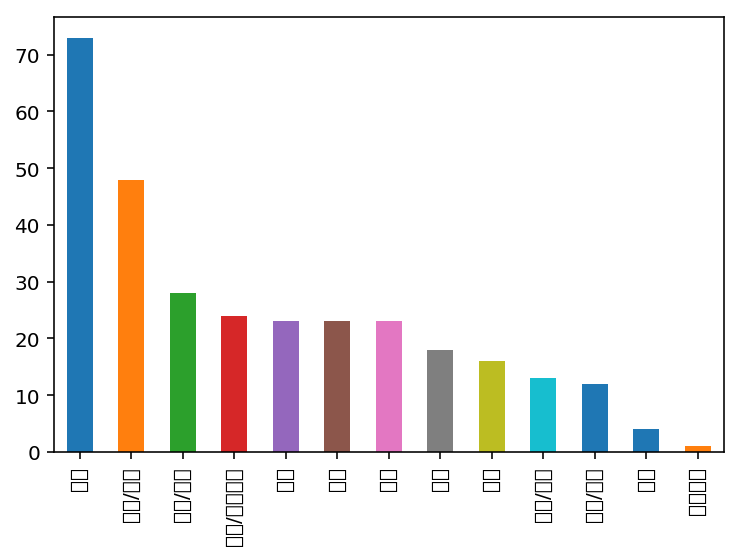

In [50]:
# 잘못 예측한 카테고리 중 ㅇㅇㅇ 카테고리가 가장 많습니다.
%matplotlib inline
predict_incorrect_value.plot(kind='bar')

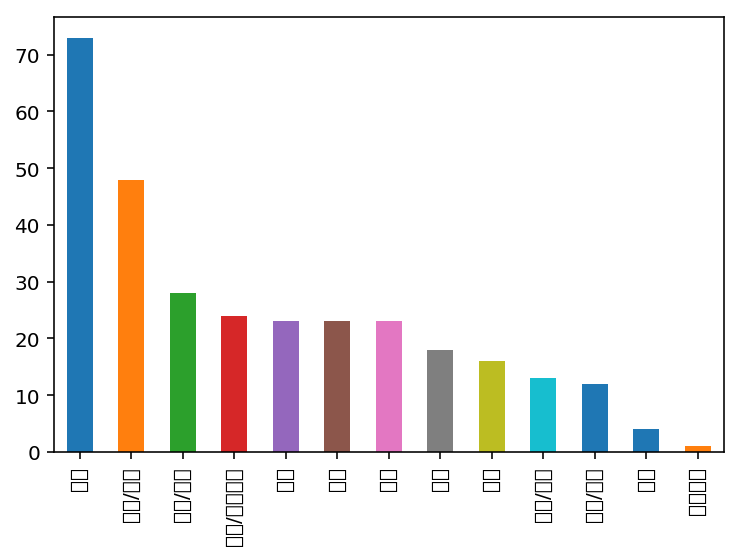

In [62]:
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_location = 'C:/windows/fonts/NanumBarunGothic.ttf'
# font_name = font_manager.FontProperties(fname=font_location).get_name()
# print(font_name)
# rc('font', family=font_name)


# 잘못 예측한 카테고리 중 인권/성평등 카테고리가 가장 많습니다.
%matplotlib inline
predict_incorrect_value.plot(kind='bar')

In [61]:
predict_incorrect_etc = predict_incorrect.loc[predict_incorrect['category'] == '기타'].copy()
predict_incorrect_etc[['category', 'category_pred', 'title', 'content']].head(10)